In [1]:
import pandas as pd
import numpy as np 

# Load the dataset
file_path = 'cleaned_dataset_car.csv'
data = pd.read_csv(file_path)

In [2]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8080 non-null   int64  
 1   selling_price  8080 non-null   float64
 2   km_driven      8080 non-null   float64
 3   fuel           8080 non-null   object 
 4   seller_type    8080 non-null   object 
 5   transmission   8080 non-null   object 
 6   owner          8080 non-null   object 
 7   mileage        8080 non-null   float64
 8   engine         8080 non-null   float64
 9   max_power      8080 non-null   float64
 10  torque         8080 non-null   float64
 11  seats          8080 non-null   int64  
 12  brand_name     8080 non-null   object 
 13  model          8080 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 883.9+ KB


In [4]:
df = data.copy()

In [5]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift


In [6]:
df['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2], dtype=int64)

In [7]:
df['seats'] = np.where(df['seats'] == 10,9,np.where(df['seats'] == 14,9,df['seats']))

In [8]:
df['seats'].value_counts()

seats
5    6421
7    1128
8     235
4     133
9     100
6      61
2       2
Name: count, dtype: int64

In [9]:
# Drop rows where the 'seats' column has the value 2
df = df[df['seats'] != 2]

In [10]:
df.shape

(8078, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8078 entries, 0 to 8079
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8078 non-null   int64  
 1   selling_price  8078 non-null   float64
 2   km_driven      8078 non-null   float64
 3   fuel           8078 non-null   object 
 4   seller_type    8078 non-null   object 
 5   transmission   8078 non-null   object 
 6   owner          8078 non-null   object 
 7   mileage        8078 non-null   float64
 8   engine         8078 non-null   float64
 9   max_power      8078 non-null   float64
 10  torque         8078 non-null   float64
 11  seats          8078 non-null   int64  
 12  brand_name     8078 non-null   object 
 13  model          8078 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 946.6+ KB


In [12]:
df['seats'] = np.where(df['seats'] == 2,'two',np.where(df['seats'] == 5, 'five',np.where(df['seats'] == 6,'six',np.where(df['seats'] == 7,'seven',np.where(df['seats'] == 8,'eight','nine')))))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8078 entries, 0 to 8079
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8078 non-null   int64  
 1   selling_price  8078 non-null   float64
 2   km_driven      8078 non-null   float64
 3   fuel           8078 non-null   object 
 4   seller_type    8078 non-null   object 
 5   transmission   8078 non-null   object 
 6   owner          8078 non-null   object 
 7   mileage        8078 non-null   float64
 8   engine         8078 non-null   float64
 9   max_power      8078 non-null   float64
 10  torque         8078 non-null   float64
 11  seats          8078 non-null   object 
 12  brand_name     8078 non-null   object 
 13  model          8078 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 946.6+ KB


In [14]:
df['seats'].unique()

array(['five', 'nine', 'seven', 'eight', 'six'], dtype=object)

In [15]:
current_year = pd.Timestamp.now().year

In [16]:
df['number_of_year_used'] = df['year'].apply(lambda x : current_year - x) 

In [17]:
df.drop(columns=['year'],inplace = True)

In [18]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,five,Maruti,Swift-Dzire,10
1,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,five,Skoda,Rapid,10
2,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,five,Honda,City,18
3,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,five,Hyundai,i20,14
4,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,five,Maruti,Swift,17


In [19]:
df.isnull().sum()

selling_price          0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
mileage                0
engine                 0
max_power              0
torque                 0
seats                  0
brand_name             0
model                  0
number_of_year_used    0
dtype: int64

In [20]:
categorical_variables = [i for i in df.columns.tolist() if df[i].dtype == 'O']

In [21]:
numerical_variables = [i for i in df.columns.tolist() if i not in categorical_variables]

In [22]:
numerical_variables

['selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'number_of_year_used']

In [23]:
categorical_variables

['fuel',
 'seller_type',
 'transmission',
 'owner',
 'seats',
 'brand_name',
 'model']

In [24]:
for i in categorical_variables:
    print(f'Then column {i} is having {df[i].nunique()} unique values')

Then column fuel is having 4 unique values
Then column seller_type is having 3 unique values
Then column transmission is having 2 unique values
Then column owner is having 4 unique values
Then column seats is having 5 unique values
Then column brand_name is having 21 unique values
Then column model is having 155 unique values


In [25]:
 a = df['model'].value_counts().reset_index()

In [26]:
a[a['model'] == 'Other']

,model,count
32,Other,70


In [27]:
df= df[df['model'] != 'Other']

In [28]:
df.shape

(8008, 14)

In [29]:
df.reset_index(inplace=True)

In [30]:
df.drop(columns='index',inplace=True)

In [31]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.000,190.00,five,Maruti,Swift-Dzire,10
1,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.520,250.00,five,Skoda,Rapid,10
2,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.000,127.00,five,Honda,City,18
3,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.000,224.00,five,Hyundai,i20,14
4,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.200,115.00,five,Maruti,Swift,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,200000.0,100000.0,Diesel,Individual,Manual,First Owner,12.99,2494.0,102.000,200.00,seven,Toyota,Qualis,24
8004,140000.0,50000.0,Petrol,Individual,Manual,Second Owner,19.81,1197.0,81.860,114.73,five,Hyundai,Santro,24
8005,145000.0,80000.0,Petrol,Individual,Manual,Second Owner,19.81,1197.0,81.860,114.73,five,Hyundai,Santro,18
8006,580000.0,165000.0,Diesel,Individual,Manual,First Owner,20.00,1497.0,94.805,160.00,five,Ford,Figo,7


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [33]:
df.drop('brand_name', axis=1, inplace=True)

In [34]:
df.shape

(8008, 13)

In [35]:
# Encode categorical variables
label_encoder=LabelEncoder()

label_encoder.fit(df['model'])

LabelEncoder()

In [36]:
df['model']=label_encoder.fit_transform(df['model'])

In [37]:
df['model'].nunique()

154

In [38]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,model,number_of_year_used
0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,five,123,10
1,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,five,104,10
2,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,five,31,18
3,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,five,153,14
4,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,five,122,17


In [39]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
X_train.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,model,number_of_year_used
1872,15000.0,Petrol,Individual,Manual,First Owner,21.10,814.0,55.20,74.5,five,40,6
6232,90000.0,Diesel,Individual,Manual,First Owner,23.00,1498.0,98.96,205.0,five,42,6
2663,50000.0,Diesel,Individual,Manual,First Owner,12.20,2498.0,112.00,260.0,eight,148,12
6994,70100.0,Diesel,Dealer,Manual,First Owner,22.54,1396.0,88.73,219.7,five,153,10
57,59000.0,Diesel,Dealer,Automatic,First Owner,14.84,2143.0,170.00,400.0,five,24,11


In [41]:
X_test.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,model,number_of_year_used
554,70000.0,Diesel,Individual,Manual,Second Owner,20.00,1399.0,68.1,160.0,five,55,11
6780,140000.0,Petrol,Individual,Manual,First Owner,15.40,1497.0,117.3,145.0,seven,18,8
3101,1303.0,Petrol,Dealer,Manual,First Owner,17.80,1198.0,86.7,109.0,five,10,5
7047,6000.0,Diesel,Dealer,Automatic,First Owner,17.90,2143.0,170.0,400.0,five,59,6
2605,30000.0,Petrol,Individual,Automatic,First Owner,15.63,1499.0,110.4,140.0,five,42,9


In [42]:
numerical_variables

['selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'number_of_year_used']

In [43]:
X_test[['seller_type','fuel','transmission','owner','seats']].nunique()

seller_type     3
fuel            4
transmission    2
owner           4
seats           5
dtype: int64

In [44]:
X_train[['seller_type','fuel','transmission','owner','seats']].nunique()

seller_type     3
fuel            4
transmission    2
owner           4
seats           5
dtype: int64

In [45]:
# Create Column Transformer with 3 types of transformers
num_features = ['km_driven','mileage','engine','max_power','torque','number_of_year_used']
onehot_columns = ['seller_type','fuel','transmission','owner','seats']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [46]:
X_train_scaled = preprocessor.fit(X_train)

In [47]:
X_test_scaled = preprocessor.fit_transform(X_test)
X_train_scaled = preprocessor.fit_transform(X_train)

In [48]:
X_train_scaled.shape,X_test_scaled.shape

((6006, 20), (2002, 20))

In [49]:
X_train_scaled

array([[  1.        ,   0.        ,   0.        , ...,  -1.14077923,
         -1.05269693,  40.        ],
       [  1.        ,   0.        ,   1.        , ...,   0.34071308,
         -1.05269693,  42.        ],
       [  1.        ,   0.        ,   1.        , ...,   0.96509682,
          0.46252062, 148.        ],
       ...,
       [  1.        ,   0.        ,   1.        , ...,   0.55640928,
          0.96759314, 153.        ],
       [  1.        ,   0.        ,   1.        , ...,   0.17042661,
         -0.80016067,  22.        ],
       [  1.        ,   0.        ,   1.        , ...,   0.28395093,
         -0.54762442,  74.        ]])

In [50]:
X_test_scaled

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -1.74207908e-01,  1.93376987e-01,  5.50000000e+01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.46306449e-01, -5.48745813e-01,  1.80000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.59342947e-01, -1.29086861e+00,  1.00000000e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.59342947e-01,  4.40751253e-01,  2.30000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         8.59071731e-01,  1.93376987e-01,  1.35000000e+02],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         5.52568127e-02,  1.67762259e+00,  2.10000000e+01]])

## Model Training And Model Selection

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [53]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

In [54]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 439954.2312
- Mean Absolute Error: 267985.6615
- R2 Score: 0.6895
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 422851.1658
- Mean Absolute Error: 265772.0420
- R2 Score: 0.6982


Lasso
Model performance for Training set
- Root Mean Squared Error: 439954.2323
- Mean Absolute Error: 267982.7117
- R2 Score: 0.6895
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 422849.7440
- Mean Absolute Error: 265767.4482
- R2 Score: 0.6982


Ridge
Model performance for Training set
- Root Mean Squared Error: 439955.4593
- Mean Absolute Error: 267853.5683
- R2 Score: 0.6895
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 422829.0710
- Mean Absolute Error: 265584.8777
- R2 Score: 0.6982


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 129549.8322
- Mean 

In [55]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, None, 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [56]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)
                   
                   ]

In [57]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_scaled, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\yash\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 2}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


## Random Forest Regressor

In [58]:
model = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=7, max_depth=None, 
                                                     n_jobs=-1)

In [59]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features=7, n_jobs=-1)

In [60]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


In [61]:
# Model Accquray in training data
model_train_mae , model_train_rmse, model_train_r2

(24697.44772454386, 47103.23811621033, 0.9964407509566846)

In [62]:
# Model Accquray on test data 
model_test_mae , model_test_rmse, model_test_r2

(78072.60126817062, 157264.88138842213, 0.9582492922821904)

In [63]:
residuals_train = y_train - y_train_pred

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

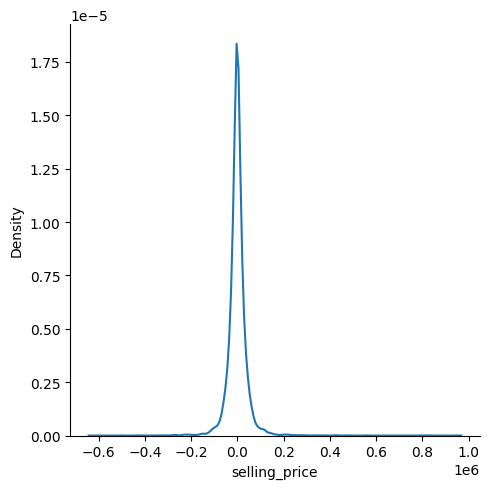

In [65]:
sns.displot(residuals_train,kind='kde')
plt.show()

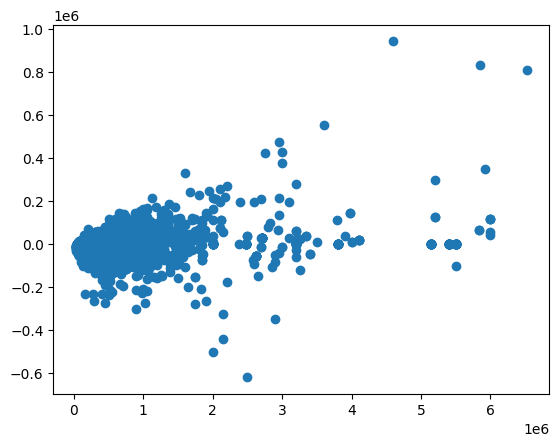

In [66]:
plt.scatter(y_train,residuals_train)
plt.show()

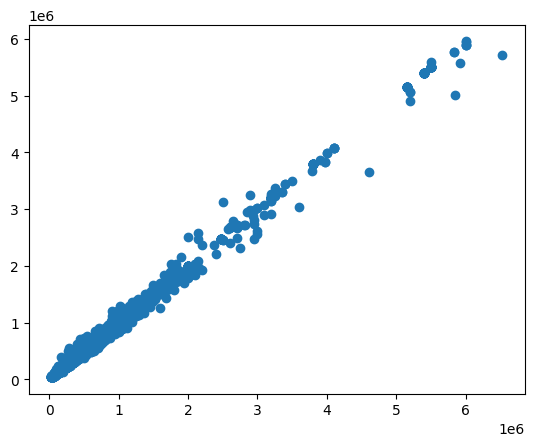

In [67]:
plt.scatter(y_train,y_train_pred)

In [68]:
residuals_test = y_test - y_test_pred

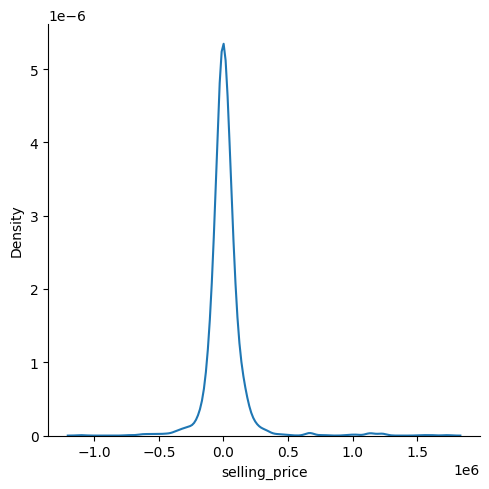

In [69]:
sns.displot(residuals_test,kind='kde')
plt.show()

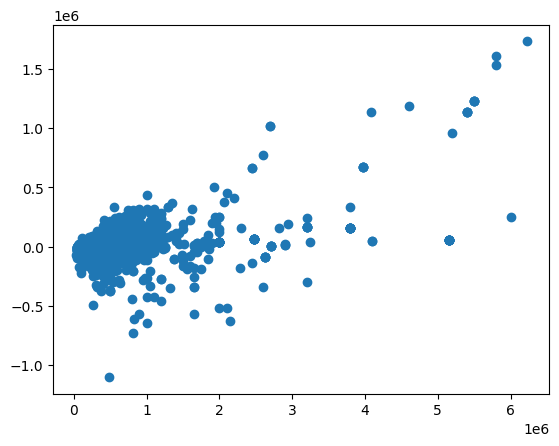

In [70]:
plt.scatter(y_test,residuals_test)
plt.show()

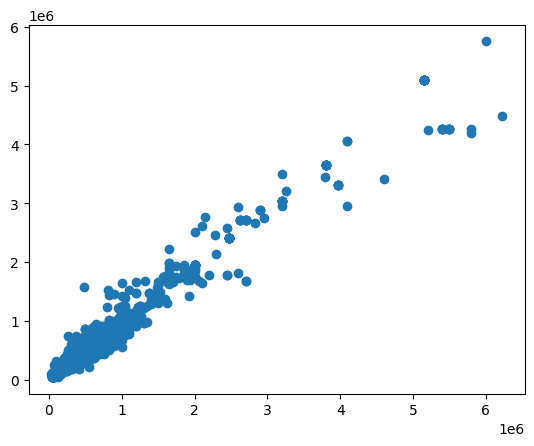

In [71]:
plt.scatter(y_test,y_test_pred)

In [72]:
import pickle

In [73]:
# Save the prediction model
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [74]:
# Save the transformation model
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [75]:
# Save the prediction model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [76]:
df[130:150]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,model,number_of_year_used
130,3790000.0,29500.0,Diesel,Dealer,Automatic,First Owner,22.48,1995.0,187.74,400.0,five,1,6
131,5800000.0,7500.0,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,400.0,five,141,5
132,1864999.0,50000.0,Petrol,Dealer,Automatic,First Owner,14.67,1798.0,177.46,250.0,five,121,6
133,2700000.0,35000.0,Diesel,Dealer,Automatic,First Owner,15.00,2143.0,204.00,500.0,five,39,8
134,795000.0,41000.0,Petrol,Dealer,Automatic,First Owner,18.00,1497.0,117.60,145.0,five,31,7
135,625000.0,39000.0,Petrol,Dealer,Automatic,First Owner,14.28,1798.0,138.03,173.0,five,35,11
136,3400000.0,22000.0,Diesel,Dealer,Automatic,First Owner,18.00,1969.0,190.00,400.0,five,142,6
137,2650000.0,53000.0,Diesel,Dealer,Automatic,First Owner,12.07,2967.0,241.40,550.0,seven,101,9
138,535000.0,40000.0,Diesel,Dealer,Manual,First Owner,26.21,1248.0,88.50,200.0,five,30,9
139,5850000.0,47000.0,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,282.00,490.0,five,108,7


In [77]:
df.iloc[147,0]

599000.0

In [78]:
df.iloc[147,1:].values.tolist()

[46100.0,
 'Petrol',
 'Dealer',
 'Manual',
 'First Owner',
 16.02,
 1373.0,
 93.7,
 130.0,
 'seven',
 49,
 10]

In [79]:
df.columns[1:]

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'torque', 'seats', 'model',
       'number_of_year_used'],
      dtype='object')

In [80]:
data_point = pd.DataFrame(df.iloc[147,1:].values,df.columns[1:])

In [81]:
data_point.transpose()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,model,number_of_year_used
0,46100.0,Petrol,Dealer,Manual,First Owner,16.02,1373.0,93.7,130.0,seven,49,10


In [82]:
scaled_data_point = preprocessor.transform(data_point.transpose())

In [83]:
scaled_data_point 

array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        -0.48816492775964654, -0.8969482670085421, -0.1502636680009669,
        0.08370204106532482, -0.5107192821239722, -0.042551897159392574,
        49]], dtype=object)

In [84]:
model.predict(scaled_data_point)[0]

573630.0

In [85]:
import pickle

In [86]:
# Load the transformation model
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

In [87]:
# Load the transformation model
with open('preprocessor.pkl', 'rb') as file:
    preprocessor = pickle.load(file)

In [88]:
# Load the prediction model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [89]:
import pandas as pd

In [90]:
input_features = pd.DataFrame({
    'km_driven': [165000.00],
    'fuel': ['Diesel'],
    'seller_type': ['Individual'],
    'transmission': ['Manual'],
    'owner': ['First Owner'],
    'mileage': [20.00],
    'engine': [1497.00],
    'max_power': [94.81],
    'torque': [160.00],
    'seats': ['five'],
    'model': ['Figo'],
    'number_of_year_used': [7.00]
})

In [92]:
input_features['model'] = label_encoder.transform(input_features['model'])

In [93]:
input_features

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,model,number_of_year_used
0,165000.0,Diesel,Individual,Manual,First Owner,20.0,1497.0,94.81,160.0,five,55,7.0


In [94]:
# Transform the input feature
transformed_features = preprocessor.transform(input_features)

# Make predictions
prediction = model.predict(transformed_features)

In [95]:
prediction[0]

604149.97